**CORONA PANDAMIC DEATHRATE ANALYSIS**




death rate of covid 19 pandamic between 18 april to 18 may of 2020 is analysed

In [6]:
# importing libs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import seaborn as sns
from datetime import datetime

Loading dateset(.csv) and displaying

In [3]:
worldometer_df = pd.read_csv('drate.csv')
worldometer_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


to display data of specific country

In [25]:
country_name = 'India'

country_df = worldometer_df.loc[worldometer_df['Country'] == country_name, :].reset_index(drop=True)
country_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,India,1378381772,335123.0,16365.0,521.0,2463.0,NaN,13381.0
1,2020-04-19,India,1378381772,401586.0,17615.0,559.0,2854.0,NaN,14202.0
2,2020-04-20,India,1378381772,401586.0,18539.0,592.0,3273.0,NaN,14674.0
3,2020-04-21,India,1378381772,447812.0,20080.0,645.0,3975.0,NaN,15460.0
4,2020-04-22,India,1378381772,462621.0,21370.0,681.0,4370.0,NaN,16319.0
5,2020-04-23,India,1378381772,500542.0,23039.0,721.0,5012.0,NaN,17306.0
6,2020-04-24,India,1378381772,541789.0,24447.0,780.0,5496.0,NaN,18171.0
7,2020-04-25,India,1378381772,579957.0,26283.0,825.0,5939.0,NaN,19519.0
8,2020-04-26,India,1378381772,625309.0,27890.0,881.0,6523.0,NaN,20486.0
9,2020-04-27,India,1378381772,665819.0,29451.0,939.0,7137.0,NaN,21375.0


to display data of specific date

In [14]:
selected_date = datetime.strptime('18/05/2020', '%d/%m/%Y')

selected_date_df = worldometer_df.loc[worldometer_df['Date'] == selected_date.strftime('%Y-%m-%d'), :].reset_index(drop=True)
selected_date_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-05-18,USA,330774664,12300744.0,1550294.0,91981.0,356383.0,16868.0,1101930.0
1,2020-05-18,Russia,145927292,7147014.0,290678.0,2722.0,70209.0,2300.0,217747.0
2,2020-05-18,Spain,46752703,3037840.0,278188.0,27709.0,196958.0,1152.0,53521.0
3,2020-05-18,Brazil,212380932,735224.0,255368.0,16853.0,100459.0,8318.0,138056.0
4,2020-05-18,UK,67844241,2682716.0,246406.0,34796.0,NaN,1559.0,NaN
...,...,...,...,...,...,...,...,...,...
208,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
209,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
210,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
211,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


taking the selected date for analysis
-***Now calculate the naive death rate for each country and show histogram***

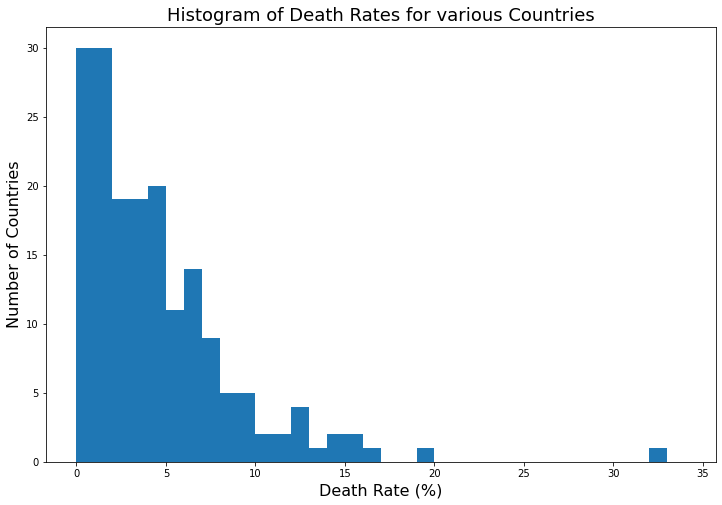

In [16]:
selected_date_df['Case Fatality Ratio'] = selected_date_df['Total Deaths'] / selected_date_df['Total Cases']

plt.figure(figsize=(12,8))
plt.hist(100 * np.array(selected_date_df['Case Fatality Ratio']), bins=np.arange(35))
plt.xlabel('Death Rate (%)', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Histogram of Death Rates for various Countries', fontsize=18)
plt.show()

**We see a large spread of death rates between countries**

Filter out countries with small amount of cases :
minimum is set as 1000

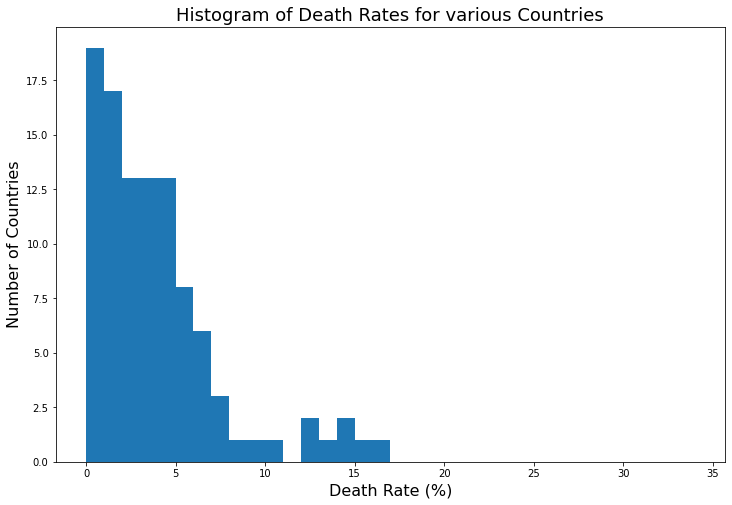

In [19]:
min_number_of_cases = 1000

greatly_affected_df = selected_date_df.loc[selected_date_df['Total Cases'] > min_number_of_cases,:]

plt.figure(figsize=(12,8))
plt.hist(100 * np.array(greatly_affected_df['Case Fatality Ratio']), bins=np.arange(35))
plt.xlabel('Death Rate (%)', fontsize=16)
plt.ylabel('Number of Countries', fontsize=16)
plt.title('Histogram of Death Rates for various Countries', fontsize=18)
plt.show()

**Plot scatter of death rate as function of testing quality.**
We know some countries were more responsible regarding their testing strategy and some were less so let’s plot the death rate as function of testing quality :

posx and posy should be finite values
posx and posy should be finite values


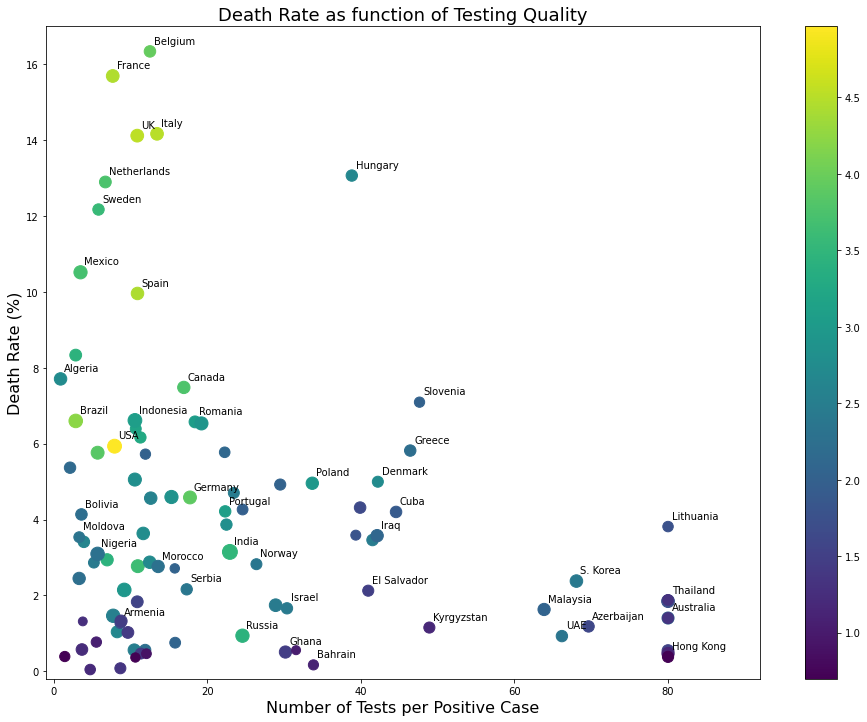

In [22]:
selected_date_df['Num Tests per Positive Case'] = selected_date_df['Total Tests'] / selected_date_df['Total Cases']

min_number_of_cases = 1000
greatly_affected_df = selected_date_df.loc[selected_date_df['Total Cases'] > min_number_of_cases,:]

x_axis_limit = 80

death_rate_percent = 100 * np.array(greatly_affected_df['Case Fatality Ratio'])
num_test_per_positive = np.array(greatly_affected_df['Num Tests per Positive Case'])
num_test_per_positive[num_test_per_positive > x_axis_limit] = x_axis_limit
total_num_deaths = np.array(greatly_affected_df['Total Deaths'])
population = np.array(greatly_affected_df['Population'])

plt.figure(figsize=(16,12))
plt.scatter(x=num_test_per_positive, y=death_rate_percent, 
            s=0.5*np.power(np.log(1+population),2), 
            c=np.log10(1+total_num_deaths))
plt.colorbar()
plt.ylabel('Death Rate (%)', fontsize=16)
plt.xlabel('Number of Tests per Positive Case', fontsize=16)
plt.title('Death Rate as function of Testing Quality', fontsize=18)
plt.xlim(-1, x_axis_limit + 12)
plt.ylim(-0.2,17)

# plot on top of the figure the names of the
#countries_to_display = greatly_affected_df['Country'].unique().tolist()
countries_to_display = ['USA', 'Russia', 'Spain', 'Brazil', 'UK', 'Italy', 'France', 
                        'Germany', 'India', 'Canada', 'Belgium', 'Mexico', 'Netherlands', 
                        'Sweden', 'Portugal', 'UAE', 'Poland', 'Indonesia', 'Romania', 
                        'Israel','Thailand','Kyrgyzstan','El Salvador', 'S. Korea', 
                        'Denmark', 'Serbia', 'Norway', 'Algeria', 'Bahrain','Slovenia',
                        'Greece','Cuba','Hong Kong','Lithuania', 'Australia', 'Morocco', 
                        'Malaysia', 'Nigeria', 'Moldova', 'Ghana', 'Armenia', 'Bolivia', 
                        'Iraq', 'Hungary', 'Cameroon', 'Azerbaijan']

for country_name in countries_to_display:
    country_index = greatly_affected_df.index[greatly_affected_df['Country'] == country_name]
    plt.text(x=num_test_per_positive[country_index] + 0.5,
             y=death_rate_percent[country_index] + 0.2,
             s=country_name, fontsize=10)
plt.show()

***conclusion from scatter plot:***We can clearly see that the better the testing, the lower the variability of the the death between the different countries.

**Analysing best testing countries**
set a threshold no of test as 50 per positive case

In [23]:
good_testing_threshold = 50
good_testing_df = greatly_affected_df.loc[greatly_affected_df['Num Tests per Positive Case'] > good_testing_threshold,:]
good_testing_df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Case Fatality Ratio,Num Tests per Positive Case
28,2020-05-18,UAE,9875965,1600923.0,24190.0,224.0,9577.0,1.0,14389.0,0.009260,66.181191
43,2020-05-18,S. Korea,51264120,753211.0,11065.0,263.0,9904.0,55.0,898.0,0.023769,68.071487
53,2020-05-18,Australia,25464216,1062034.0,7060.0,99.0,6392.0,12.0,569.0,0.014023,150.429745
55,2020-05-18,Malaysia,32315733,443263.0,6941.0,113.0,5615.0,13.0,1213.0,0.016280,63.861547
56,2020-05-18,Kazakhstan,18749587,540708.0,6440.0,35.0,3469.0,31.0,2936.0,0.005435,83.960870
68,2020-05-18,Azerbaijan,10128288,235910.0,3387.0,40.0,2055.0,37.0,1292.0,0.011810,69.651609
69,2020-05-18,Thailand,69779718,286008.0,3031.0,56.0,2857.0,61.0,118.0,0.018476,94.360937
72,2020-05-18,Uzbekistan,33409960,460000.0,2791.0,13.0,2314.0,8.0,464.0,0.004658,164.815478
86,2020-05-18,Lithuania,2726360,231104.0,1547.0,59.0,997.0,17.0,491.0,0.038138,149.388494
89,2020-05-18,New Zealand,4817585,230718.0,1499.0,21.0,1433.0,NaN,45.0,0.014009,153.914610


and now calculate death rate of these countries

In [24]:
estimated_death_rate_percent = 100 * good_testing_df['Total Deaths'].sum() / good_testing_df['Total Cases'].sum()

print('Death Rate only for "good testing countries" is %.2f%s' %(estimated_death_rate_percent,'%'))

Death Rate only for "good testing countries" is 1.36%


#Output- Death Rate only for “good testing countries” is 1.36%

***overall conclusion :***
the deathrate of best testing countries is found less than 2% by visualizing and analysing data of world wide death rate due to covid dating between april 18 to may 18 of 2020. 